In [2]:
import sys
import seaborn as sns
import os
import glob
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import avalanches as crfn
import admin_functions as adfn
import plot as pltfn
import scipy
from scipy import stats 
import IS as isfn
import network_mod as netfn
import matplotlib
import powerlaw
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

sns.reset_orig()
#plt.style.use('dark_background')
%load_ext autoreload
%autoreload

# Define paths
#---------------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'
Ftm = '/Volumes/Dominic Time Machine/'
experiment = 'PTZ-WILDTYPE'
savepath = Fdrop + 'Project/' + experiment + os.sep 

sys.version

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'3.7.6 (default, Jan  8 2020, 13:42:34) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'

# Load data

In [3]:
experiment = 'BLNLIGHTSTIM-THAP12'
os.chdir(Fdrop + 'Project/' + experiment)
wt6_list = sorted(glob.glob('*6dpf*WT*.csv'))
wt7_list = sorted(glob.glob('*7dpf*WT*.csv'))
mu6_list = sorted(glob.glob('*6dpf*THAP12*.csv'))
mu7_list = sorted(glob.glob('*7dpf*THAP12*.csv'))

In [4]:
wt6_list, wt7_list, mu6_list, mu7_list

(['F02_6dpf_WT.csv',
  'F04_6dpf_WT.csv',
  'F05_6dpf_WT.csv',
  'F06_6dpf_WT.csv',
  'F07_6dpf_WT.csv'],
 ['F02_7dpf_WT.csv', 'F06_7dpf_WT.csv', 'F08_7dpf_WT.csv', 'F10_7dpf_WT.csv'],
 ['F04_6dpf_THAP12.csv',
  'F05_6dpf_THAP12.csv',
  'F06_6dpf_THAP12.csv',
  'F07_6dpf_THAP12.csv',
  'F08_6dpf_THAP12.csv',
  'F09_6dpf_THAP12.csv'],
 ['F04_7dpf_THAP12.csv',
  'F05_7dpf_THAP12.csv',
  'F06_7dpf_THAP12.csv',
  'F10_7dpf_THAP12.csv',
  'F11_7dpf_THAP12.csv'])

In [166]:
import pickle

namelist = ['left_tectum', 'right_tectum', 'left_cer', 'right_cer', 'left_hind', 'right_hind']
listlist = [mu7_list]
for i in range(len(listlist)):
    for e in range(len(listlist[i])):
        df = pd.read_csv(listlist[i][e])
        dic = {}
        for x in range(len(namelist)):
            curr = df['Mean(' + namelist[x] + ')']
            dic[namelist[x]] = np.asarray(curr)
            dic_pd = pd.DataFrame(dic)
        # This saves your dict
        with open(listlist[i][e][:listlist[i][e].find('csv') - 1] + '.p', 'bw') as f:
            pickle.dump(dic_pd, f)
        

In [283]:
import pickle

experiment = 'BLNLIGHTSTIM-THAP12'
os.chdir(Fdrop + 'Project/' + experiment)
wt6 = sorted(glob.glob('*6dpf*WT*p*'))
wt7 = sorted(glob.glob('*7dpf*WT*p*'))
mu6 = sorted(glob.glob('*6dpf*THAP12*p*'))
mu7 = sorted(glob.glob('*7dpf*THAP12*p*'))
wt6, wt7, mu6, mu7

(['F02_6dpf_WT.p',
  'F04_6dpf_WT.p',
  'F05_6dpf_WT.p',
  'F06_6dpf_WT.p',
  'F07_6dpf_WT.p'],
 ['F02_7dpf_WT.p', 'F06_7dpf_WT.p', 'F08_7dpf_WT.p', 'F10_7dpf_WT.p'],
 ['F04_6dpf_THAP12.p',
  'F05_6dpf_THAP12.p',
  'F06_6dpf_THAP12.p',
  'F07_6dpf_THAP12.p',
  'F08_6dpf_THAP12.p',
  'F09_6dpf_THAP12.p'],
 ['F04_7dpf_THAP12.p',
  'F05_7dpf_THAP12.p',
  'F06_7dpf_THAP12.p',
  'F10_7dpf_THAP12.p',
  'F11_7dpf_THAP12.p'])

In [6]:
name_list = ['left_tectum', 'right_tectum', 'left_cer', 'right_cer', 'left_hind', 'right_hind']
subname_list = ['tectum', 'cer', 'hind']
name_list, subname_list

(['left_tectum',
  'right_tectum',
  'left_cer',
  'right_cer',
  'left_hind',
  'right_hind'],
 ['tectum', 'cer', 'hind'])

In [26]:
## INFO
## 2100s total = 62979 frames
## Baseline = 53982 frames (30 minutes)
## Light period = 1499 frames (50 s)
## Light paradigm = 5 repeats, 4 s duration, 6s stimuli between
light_on = 120
light_off = 180
light_start = 53982
light_end = 55302
l1_start = light_start
l1_end = light_start + light_on
l2_start = l1_end + light_off
l2_end = l2_start + light_on
l3_start = l2_end + light_off
l3_end = l3_start + light_on
l4_start = l3_end + light_off
l4_end = l4_start + light_on
l5_start = l4_end + light_off
l5_end = l5_start + light_on
on_list = [l1_start, l2_start, l3_start, l4_start, l5_start]
off_list = [l1_end, l2_end, l3_end, l4_end, l5_end]
on_list, off_list

([53982, 54282, 54582, 54882, 55182], [54102, 54402, 54702, 55002, 55302])

# Define functions

In [416]:
#Functions
def corr_raw(input_list, name_list):
    output_list = list(range(len(input_list)))
    for i in range(len(input_list)):
        output_list[i] = np.corrcoef(input_list[i])
    return(output_list)

def reg_append(data_list):

    list1, list2, list3, list4, list5, list6 = [],[],[],[],[],[]
    listlist = list1, list2, list3, list4, list5, list6 
    for e in range(len(data_list)):
        for i in range(len(listlist)):
            if i == 0:
                list1 = np.append(list1,data_list[e][i])
            if i == 1:
                list2 = np.append(list2,data_list[e][i])
            if i == 2:
                list3 = np.append(list3,data_list[e][i])
            if i == 3:
                list4 = np.append(list4,data_list[e][i])
            if i == 4:
                list5 = np.append(list5,data_list[e][i])
            if i == 5:
                list6 = np.append(list6,data_list[e][i])
    return(list1, list2, list3, list4, list5, list6)




def amp(input_list, name_list):
    output_list = list(range(len(input_list)))
    for i in range(len(input_list)):
        amp_list = list(range(len(name_list)))
        for e in range(len(name_list)):
            amp_list[e] = np.sum(input_list[i][e])
        output_list[i] = amp_list
    return(output_list)


def deltaff(trace, percentile):
    newtrace = trace
    baseline = np.quantile(trace, percentile, axis= 0)
    newtrace[np.where(trace <= baseline)] = 0 #set all values below baseline to 0
    pos_index = np.where(trace > baseline) #indeces of values above baseline
    newtrace[pos_index] = (trace[pos_index] - baseline)/baseline
    return(newtrace)


def corr_list(input_list, name_list, start, end, meanreg):
    if meanreg == 'True':
        output_list = list(range(len(input_list)))
        for i in range(len(input_list)):
            dff_list = list(range(len(namelist)//2))
            with open(input_list[i], 'br') as f:
                curr = pickle.load(f)
                count=0
                for e in range(len(name_list)//2):
                    trace1 = np.array(curr[namelist[count]])[start:end]
                    trace2 = np.array(curr[namelist[count+1]])[start:end]
                    count+=2
                    stack = np.vstack((trace1 , trace2))
                    mean_trace = np.mean(stack, axis = 0)
                    dff = deltaff(mean_trace, 0.05)
                    dff_list[e] = dff
                output_list[i] = np.corrcoef(dff_list)
    else:
    
        output_list = list(range(len(input_list)))
        for i in range(len(input_list)):
            dff_list = list(range(len(namelist)))
            with open(input_list[i], 'br') as f:
                curr = pickle.load(f)
                for e in range(len(name_list)):
                    trace = np.array(curr[namelist[e]])[start:end]
                    dff = deltaff(trace, 0.05)
                    dff_list[e] = dff
                output_list[i] = np.corrcoef(dff_list)
    return(output_list)

def mean_mat(input_list, name_list):
    mean_mat = np.zeros((len(name_list), len(name_list)))
    for i in range(len(input_list)):
        curr = input_list[i]
        mean_mat = curr + mean_mat
    mean_mat = mean_mat/len(input_list)
    return(mean_mat)


import pickle
from scipy.ndimage import gaussian_filter1d



def plot_light(choose):
    output_list = list(range(len(choose)))
    for i in range(len(choose)):
        with open(choose[i], 'br') as f:
            curr = pickle.load(f)
            fig, axarr = plt.subplots(figsize = (6,2))

            reg_list = list(range(len(name_list)))
            on_shift = (np.array(on_list) - light_start)
            off_shift = (np.array(off_list) - light_start)
            for e in range(len(name_list)):
                trace = np.array(curr[name_list[e]])[light_start:light_end]
                dff = deltaff(trace, 0.05)
                data = gaussian_filter1d(dff, 3, axis = 0) 
                sum_data = np.zeros((120))
                for x in range(len(on_shift)):
                    sum_data += data[on_shift[x]:off_shift[x]]
                mean_data = sum_data/(len(on_shift))
                reg_list[e] = mean_data
                plt.plot(mean_data, label = name_list[e])
                for x in [(np.array(on_list) - light_start)[0]]: plt.vlines(x=x,  alpha = 1, ymin = np.min(data), ymax = np.max(data), color = 'green', linewidth = 2)
                for x in [(np.array(off_list) - light_start)[0]]: plt.vlines(x=x,  alpha = 1, ymin = np.min(data), ymax = np.max(data), color = 'red', linewidth = 2) 
            output_list[i] = reg_list
            #plt.legend()
            plt.show()
    return(output_list)

def Zscore(null_data, alt_data):
    euc_mat_null = np.zeros((len(null_data), len(null_data)))
    comp_euc_mat = np.zeros((len(alt_data), len(null_data)))

    for i in range(len(null_data)):
        for e in range(len(null_data)):
            euc_mat_null[i][e] = np.linalg.norm(null_data[i]-null_data[e])

    euc_nulldist = np.triu(euc_mat_null)[np.where(np.triu(euc_mat_null) !=0)]

    for i in range(len(alt_data)):
        for e in range(len(null_data)):
            comp_euc_mat[i][e] = np.linalg.norm(alt_data[i]-null_data[e])
    mean = np.mean(euc_mat_null)
    std = np.std(euc_mat_null)
    Z = (np.mean(comp_euc_mat) - mean) /std
    Z  
    return(Z, euc_nulldist, comp_euc_mat)
    

# Visualise data

F02_6dpf_WT.p


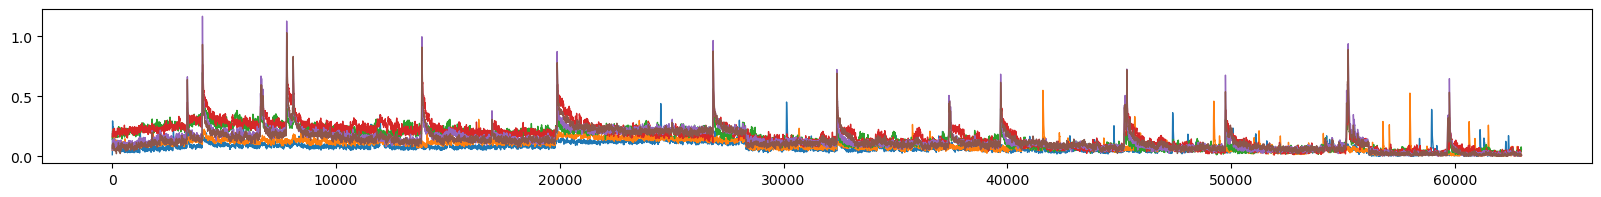

F04_6dpf_WT.p


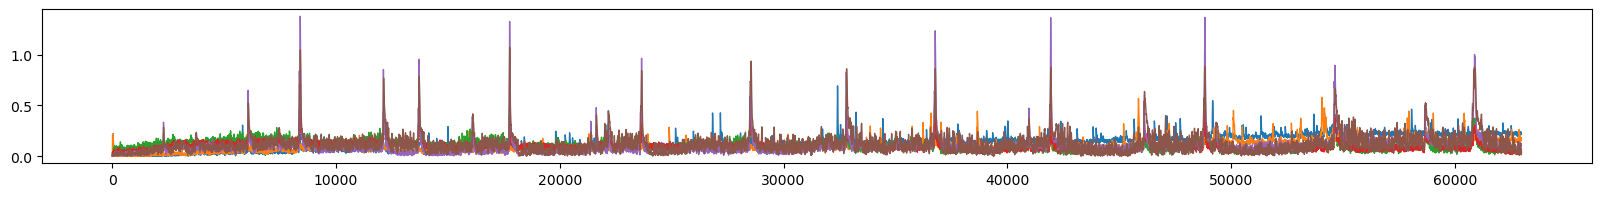

F05_6dpf_WT.p


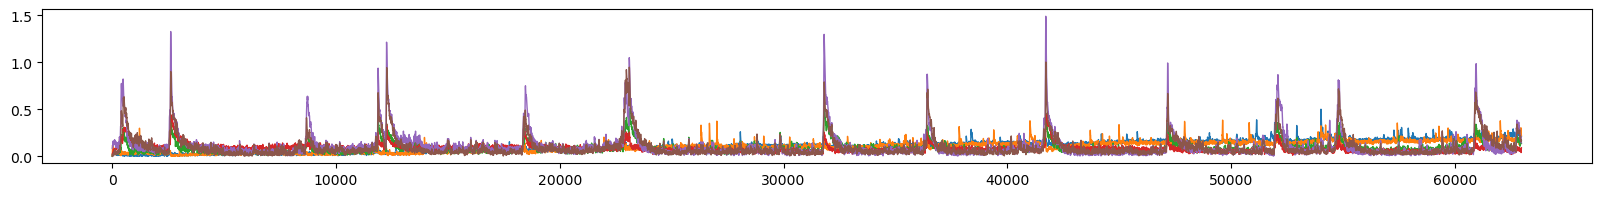

F06_6dpf_WT.p


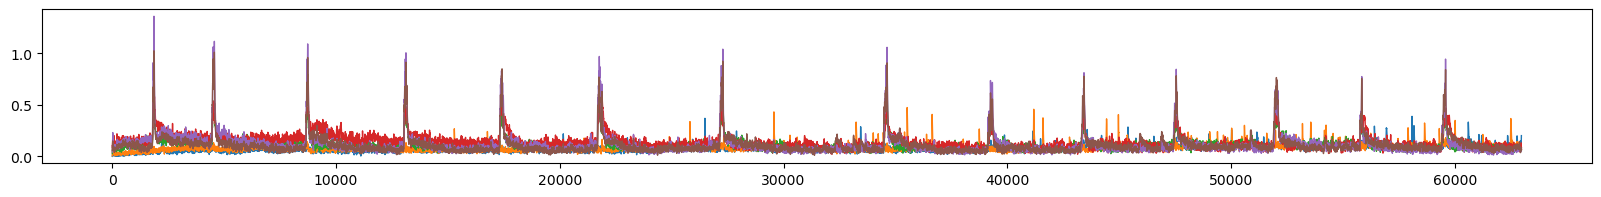

F07_6dpf_WT.p


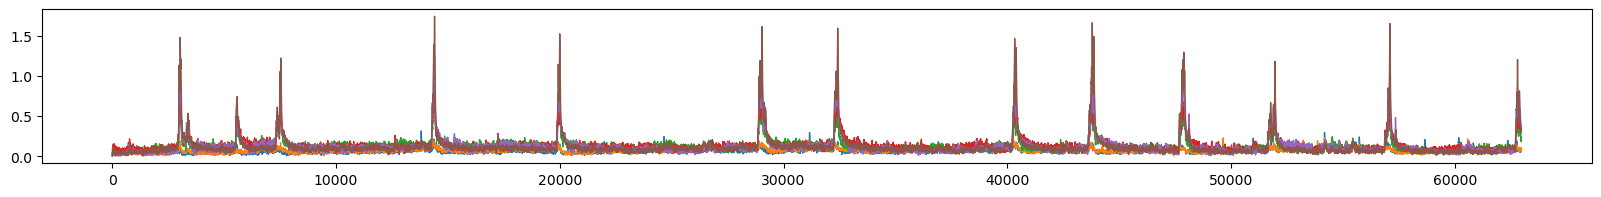

In [13]:
#### import pickle
from scipy.ndimage import gaussian_filter1d
import more_itertools as mit


for i in range(len(wt6)):
    print(wt6[i])
    with open(mu6[i], 'br') as f:
        curr = pickle.load(f)
        fig, axarr = plt.subplots(figsize = (20,2))
        reg_list = list(range(len(name_list)))
        for e in range(len(name_list)):
            trace = np.array(curr[name_list[e]])
            dff = deltaff(trace, 0.05)
            data = gaussian_filter1d(dff, 3, axis = 0)
            thresh = np.mean(data) + np.std(data)*3
            n_evs = len([list(group) for group in mit.consecutive_groups(np.where(data > thresh)[0])])
            reg_list[e] = n_evs
            plt.plot(data, label = str(name_list[e]) + '  n =' + str(n_evs), linewidth = 1)
        #plt.legend()
        plt.show()

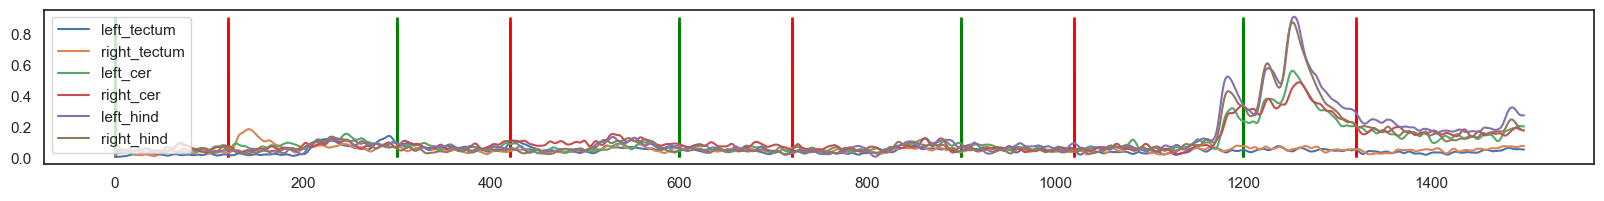

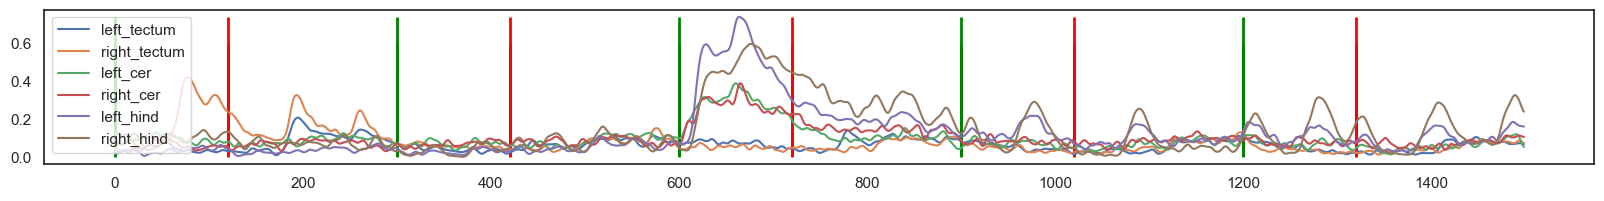

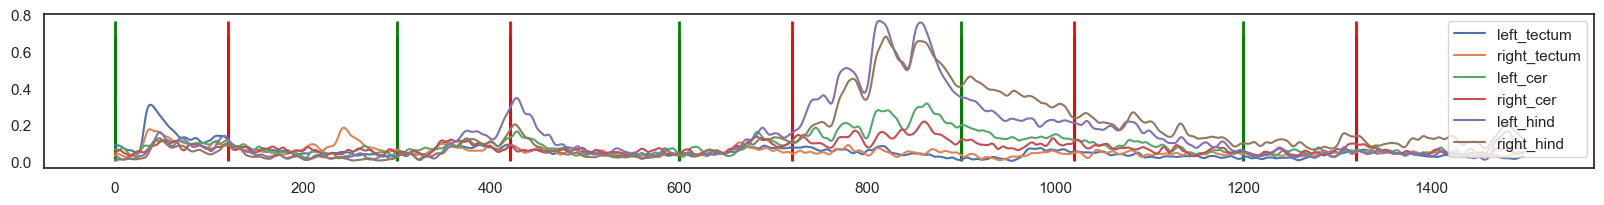

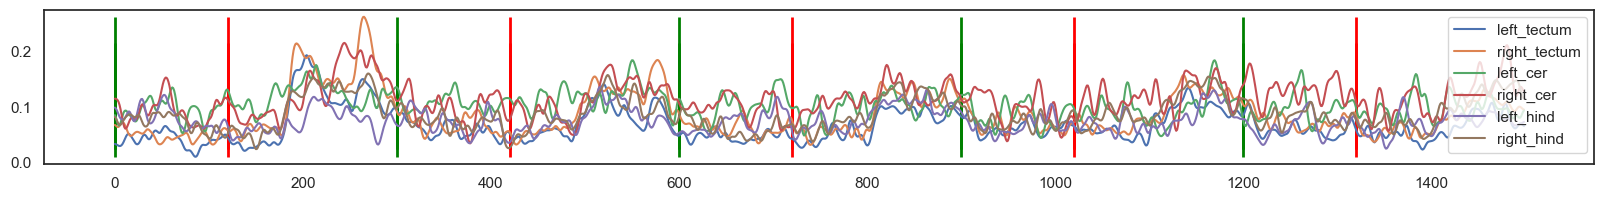

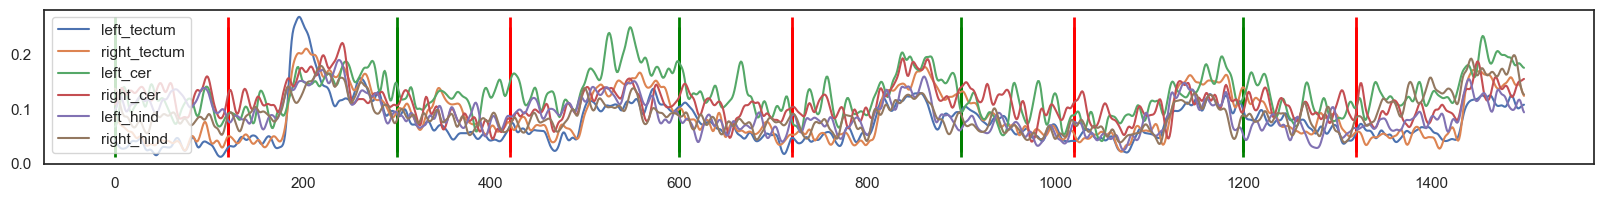

In [277]:
import pickle
from scipy.ndimage import gaussian_filter1d
choose = mu6
for i in range(len(choose)):
    with open(choose[i], 'br') as f:
        curr = pickle.load(f)
        fig, axarr = plt.subplots(figsize = (20,2))
        reg_list = list(range(len(name_list)))

        for e in range(len(name_list)):
            trace = np.array(curr[name_list[e]])[light_start:light_end + 180]
            
            dff = deltaff(trace, 0.05)
            data = gaussian_filter1d(dff, 3, axis = 0) 
            reg_list[e] = np.sum(data)
            plt.plot(data, label = name_list[e])
            for x in np.array(on_list) - light_start: plt.vlines(x=x,  alpha = 1, ymin = np.min(data), ymax = np.max(data), color = 'green', linewidth = 2)
            for x in np.array(off_list) - light_start: plt.vlines(x=x,  alpha = 1, ymin = np.min(data), ymax = np.max(data), color = 'red', linewidth = 2) 
        
        plt.legend()
        wt6_sum_list[i] = reg_list
        plt.show()

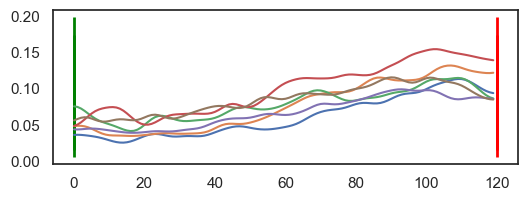

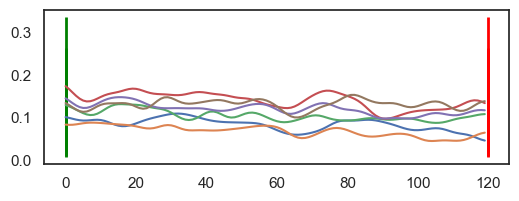

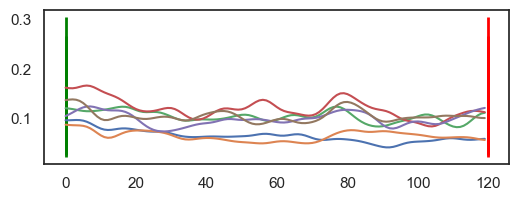

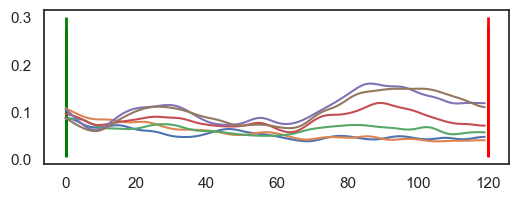

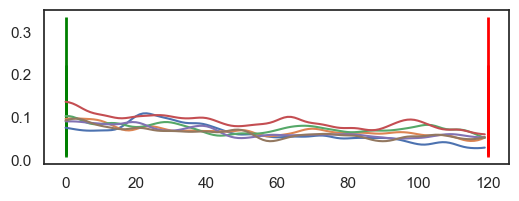

In [323]:
wt6_li = plot_light(wt6)

# Spontaneous

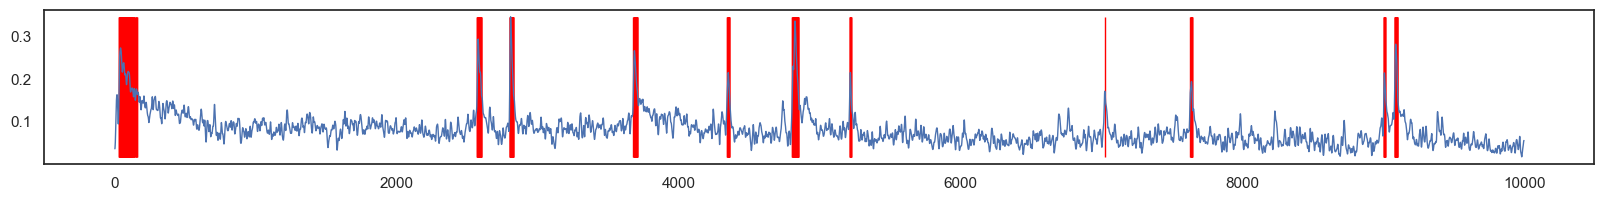

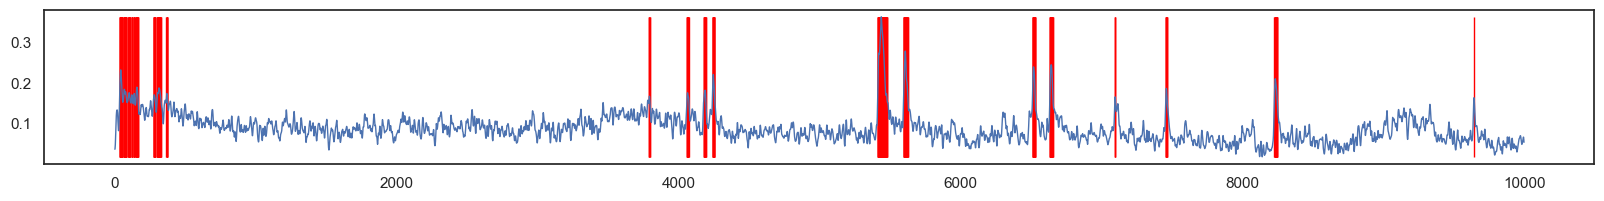

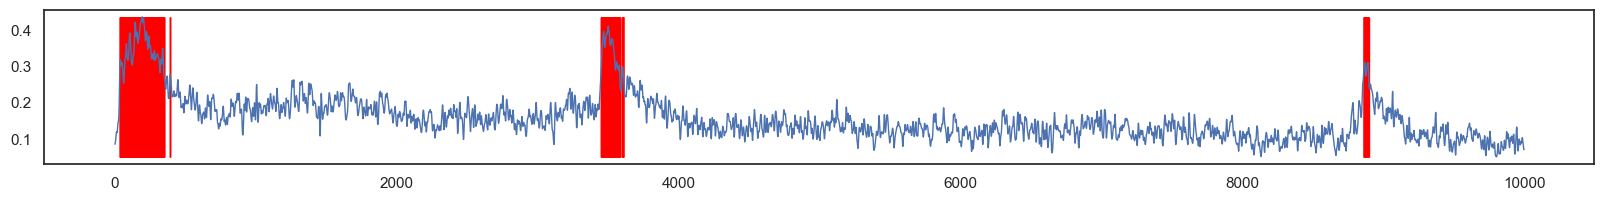

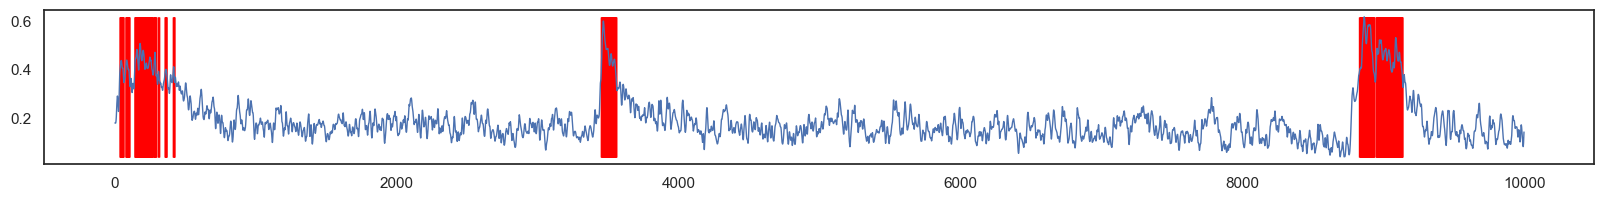

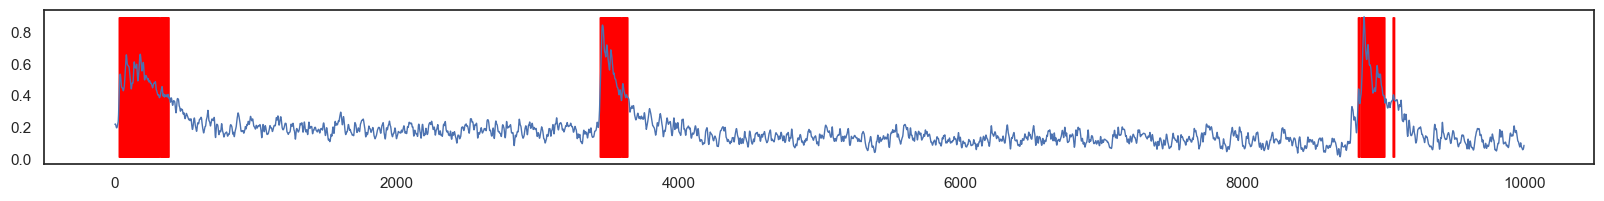

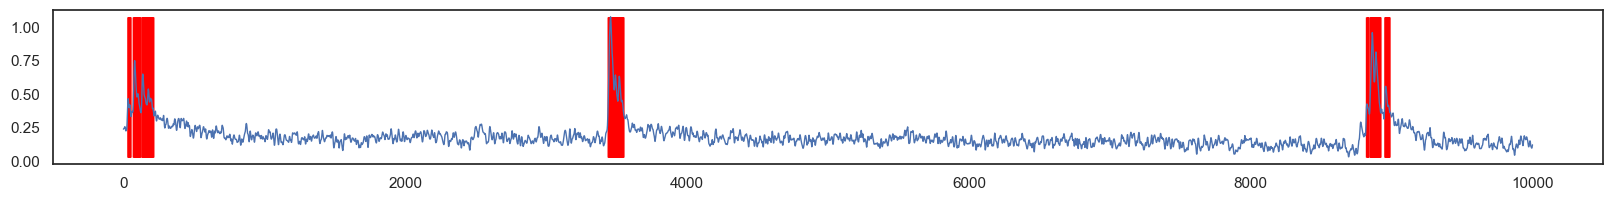

In [492]:
#Choose how many sds 

from scipy.ndimage import gaussian_filter1d
import more_itertools as mit

i = 1
with open(wt6[i], 'br') as f:
    curr = pickle.load(f)
    for e in range(len(name_list)):
        fig, axarr = plt.subplots(figsize = (20,2))
        trace = np.array(curr[name_list[e]])
        dff = deltaff(trace, 0.05)
        data = gaussian_filter1d(dff, 3, axis = 0)
        thresh = np.mean(data) + np.std(data)*2.5
        spike_index = np.where(data > thresh)[0]
        #n_evs = len([list(group) for group in mit.consecutive_groups(np.where(data > thresh)[0])])
        plot_data = data[:10000]
        plot_spike_index = np.where(plot_data > thresh)[0]
        plt.plot(plot_data, label = str(name_list[e]) + '  n =' + str(n_evs), linewidth = 1)
        for x in plot_spike_index: plt.vlines(x=x,  alpha = 1, ymin = np.min(plot_data), ymax = np.max(plot_data), color = 'red', linewidth = 1) 

        #plt.legend()
        plt.show()

In [490]:
def find_events(trace, std):
    dff = deltaff(trace, 0.05)
    data = gaussian_filter1d(dff, 3, axis = 0)
    thresh = np.mean(data) + np.std(data)*std
    spike_index = np.where(data > thresh)[0]
    n_evs = len([list(group) for group in mit.consecutive_groups(spike_index)])
    dur = len(spike_index)
    return(n_evs, dur, spike_index)

In [491]:
find_events(trace, 2.5)

(29, 1740, array([   30,    31,    32, ..., 59374, 59375, 59376]))

In [455]:
spike_index = np.where(data > thresh)[0]
spike_index.shape

(629,)

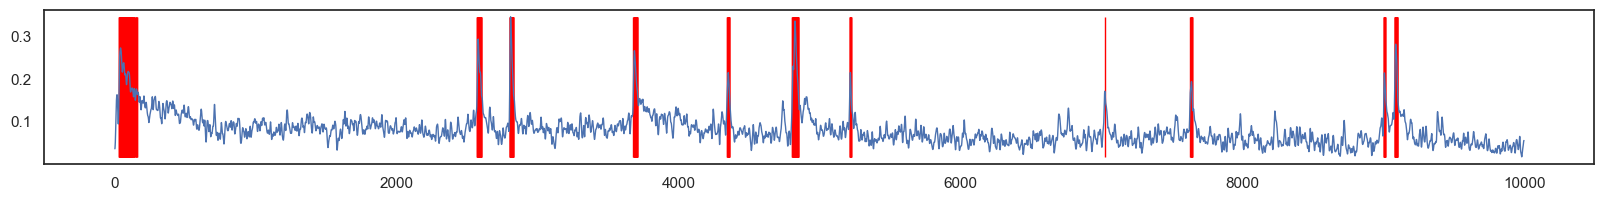

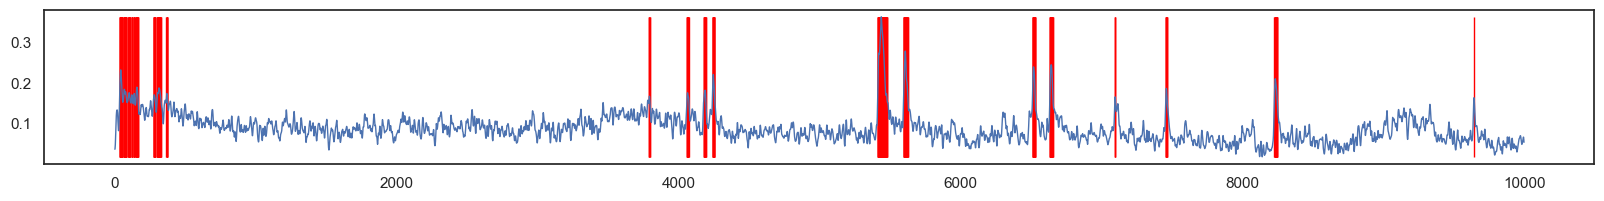

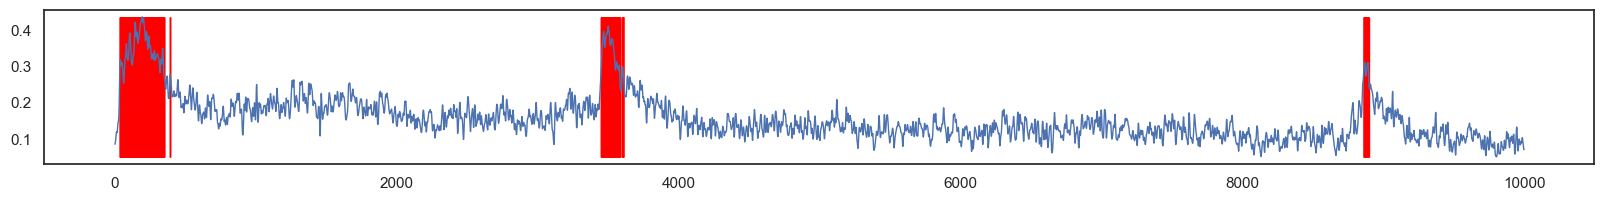

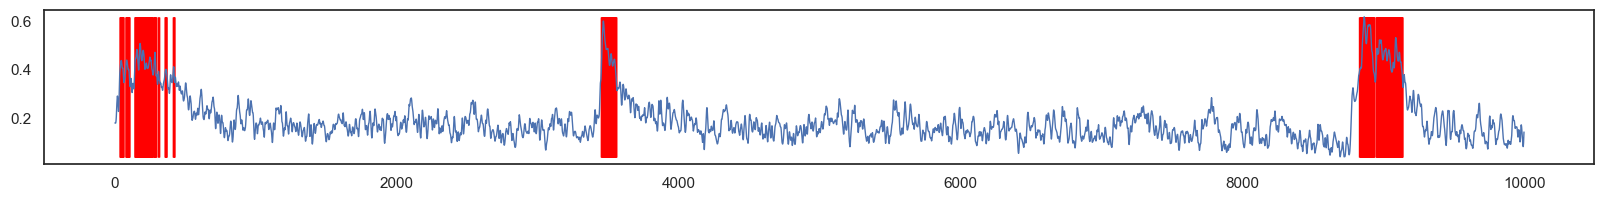

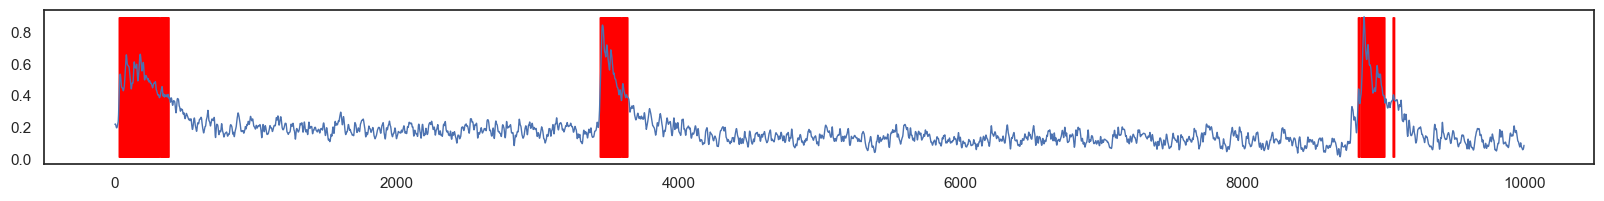

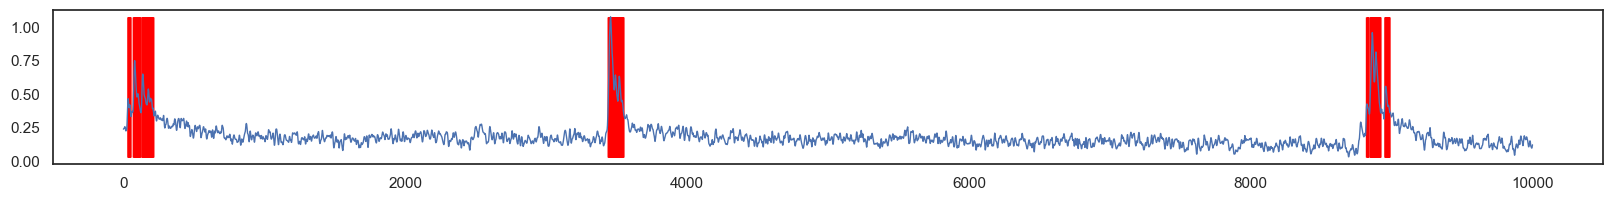

In [488]:
from scipy.ndimage import gaussian_filter1d
import more_itertools as mit

i = 1
with open(wt6[i], 'br') as f:
    curr = pickle.load(f)
    for e in range(len(name_list)):
        fig, axarr = plt.subplots(figsize = (20,2))
        trace = np.array(curr[name_list[e]])
        dff = deltaff(trace, 0.05)
        data = gaussian_filter1d(dff, 3, axis = 0)
        thresh = np.mean(data) + np.std(data)*2.5
        spike_index = np.where(data > thresh)[0]
        #n_evs = len([list(group) for group in mit.consecutive_groups(np.where(data > thresh)[0])])
        plot_data = data[:10000]
        plot_spike_index = np.where(plot_data > thresh)[0]
        plt.plot(plot_data, label = str(name_list[e]) + '  n =' + str(n_evs), linewidth = 1)
        for x in plot_spike_index: plt.vlines(x=x,  alpha = 1, ymin = np.min(plot_data), ymax = np.max(plot_data), color = 'red', linewidth = 1) 

        #plt.legend()
        plt.show()

In [ ]:
from scipy.ndimage import gaussian_filter1d
import more_itertools as mit

i = 0
with open(wt6[i], 'br') as f:
    curr = pickle.load(f)
    for e in range(len(name_list)):
        fig, axarr = plt.subplots(figsize = (20,2))
        trace = np.array(curr[name_list[e]])
        dff = deltaff(trace, 0.05)
        data = dff #gaussian_filter1d(dff, 3, axis = 0)
        thresh = np.mean(data) + np.std(data)*1
        spike_index = np.where(data > thresh)[0]
        #n_evs = len([list(group) for group in mit.consecutive_groups(np.where(data > thresh)[0])])
        plot_data = data[:10000]
        plot_spike_index = np.where(plot_data > thresh)[0]
        plt.plot(plot_data, label = str(name_list[e]) + '  n =' + str(n_evs), linewidth = 1)
        for x in plot_spike_index: plt.vlines(x=x,  alpha = 1, ymin = np.min(plot_data), ymax = np.max(plot_data), color = 'red', linewidth = 1) 

        #plt.legend()
        plt.show()

F04_6dpf_THAP12.p


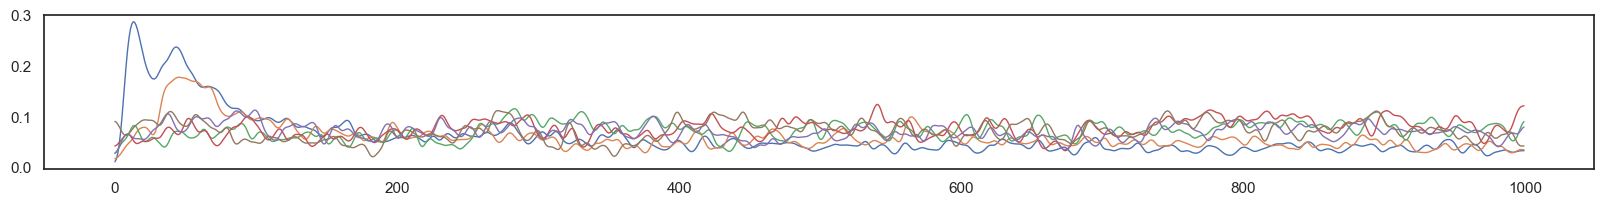

F05_6dpf_THAP12.p


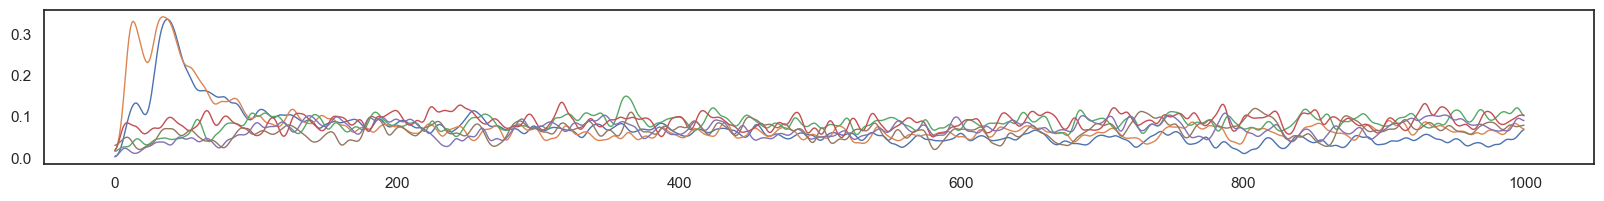

F06_6dpf_THAP12.p


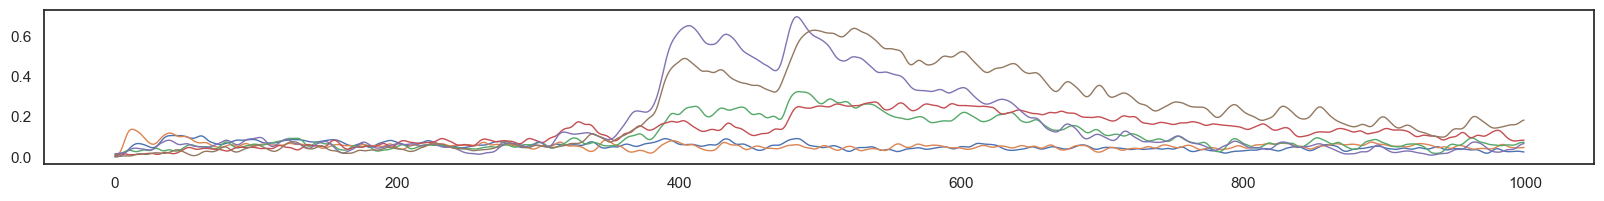

F07_6dpf_THAP12.p


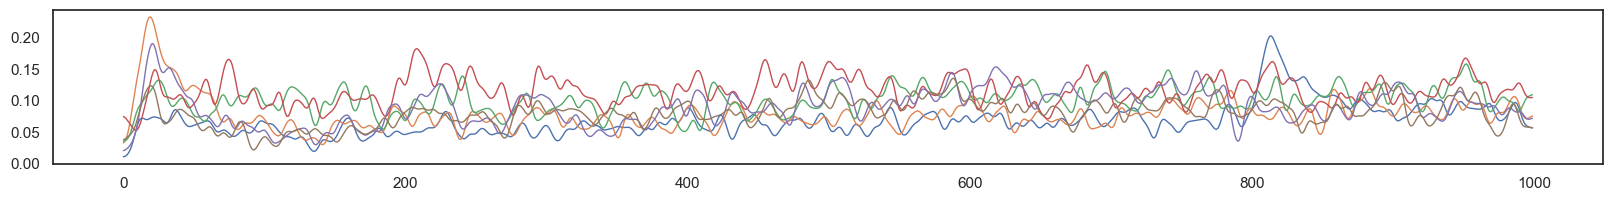

F08_6dpf_THAP12.p


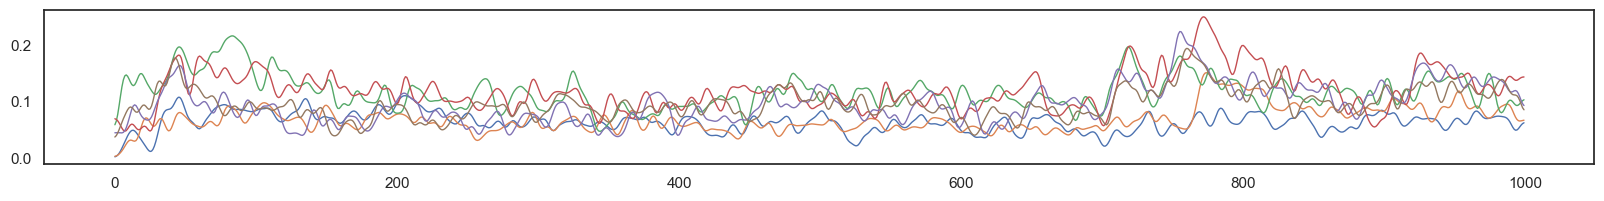

F09_6dpf_THAP12.p


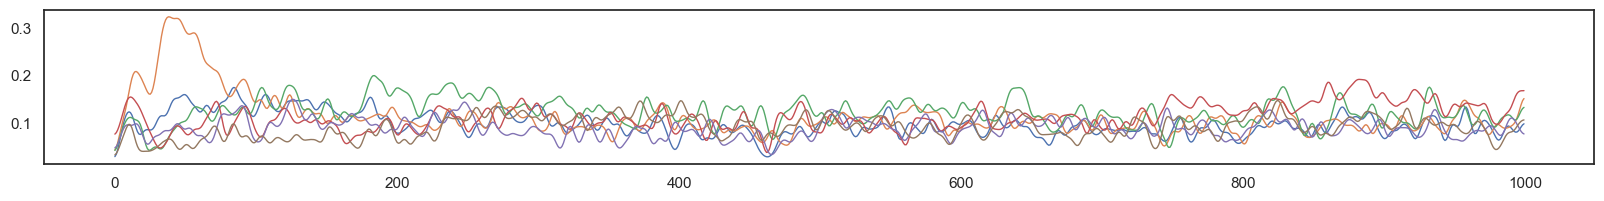

In [439]:
from scipy.ndimage import gaussian_filter1d
import more_itertools as mit


for i in range(len(mu6)):
    print(mu6[i])
    with open(mu6[i], 'br') as f:
        curr = pickle.load(f)
        fig, axarr = plt.subplots(figsize = (20,2))
        reg_list = list(range(len(name_list)))
        for e in range(len(name_list)):
            trace = np.array(curr[name_list[e]])[:1000]
            dff = deltaff(trace, 0.05)
            data = gaussian_filter1d(dff, 3, axis = 0)
            thresh = np.mean(data) + np.std(data)*3
            n_evs = len([list(group) for group in mit.consecutive_groups(np.where(data > thresh)[0])])
            reg_list[e] = n_evs
            plt.plot(data, label = str(name_list[e]) + '  n =' + str(n_evs), linewidth = 1)
        #plt.legend()
        plt.show()

# Light stim

In [ ]:
wt6_li = plot_light(wt6)
wt7_li = plot_light(wt7)
mu6_li = plot_light(mu6)
mu7_li = plot_light(mu7)
wt6_amp = amp(wt6_li, name_list)
wt7_amp = amp(wt7_li, name_list)
mu6_amp = amp(mu6_li, name_list)
mu7_amp = amp(mu7_li, name_list)
wt6_reg = reg_append(wt6_amp)
wt7_reg = reg_append(wt7_amp)
mu6_reg = reg_append(mu6_amp)
mu7_reg = reg_append(mu7_amp)

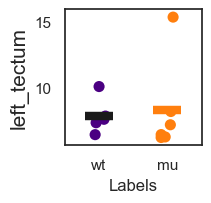

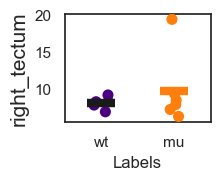

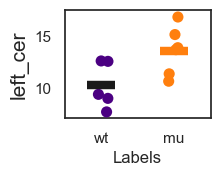

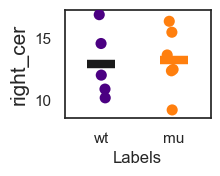

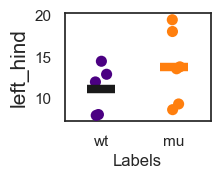

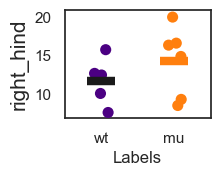

In [355]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
plt.figure(figsize=(6,6))
for o in range(len(name_list)):
    wtdata = wt6_reg[o]
    mudata = mu6_reg[o]
    nom_list = []

    for i in range(len(wtdata)):
        nom_list =  np.append(nom_list, 'wt')
    for i in range(len(mudata)):
        nom_list =  np.append(nom_list, 'mu')

    #DUR - KS
    auc_df = pd.DataFrame({"AUC": np.append(wtdata, mudata), "Labels":  nom_list})

    from matplotlib.collections import PathCollection
    sns.set(style="white")

    plt.subplot(3,3,i+1)
    ax = sns.pointplot(x="Labels", y="AUC", data = auc_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=3, markers = '_')
    for artist in ax.lines:
        artist.set_zorder(10)
    for artist in ax.findobj(PathCollection):
        artist.set_zorder(11)
    ax = sns.stripplot(x="Labels", y="AUC", data=auc_df, palette = colors1, size = 8, jitter = True ,alpha = 1)
    #plt.gca().set_title('k = ' + str(k_vals[i]))
    #plt.gca().set_xlabel('r', size = '15')
    plt.gca().set_ylabel(name_list[o], size = '15')
    ax.legend_.remove()

    plt.show()


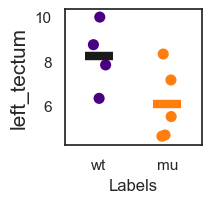

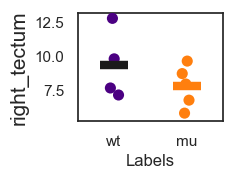

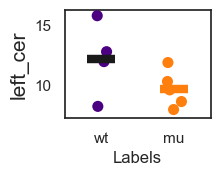

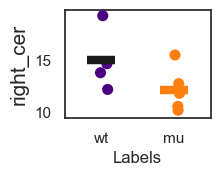

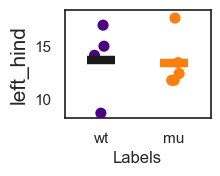

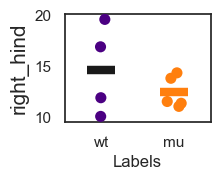

In [356]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
plt.figure(figsize=(6,6))
for o in range(len(name_list)):
    wtdata = wt7_reg[o]
    mudata = mu7_reg[o]
    nom_list = []

    for i in range(len(wtdata)):
        nom_list =  np.append(nom_list, 'wt')
    for i in range(len(mudata)):
        nom_list =  np.append(nom_list, 'mu')

    #DUR - KS
    auc_df = pd.DataFrame({"AUC": np.append(wtdata, mudata), "Labels":  nom_list})

    from matplotlib.collections import PathCollection
    sns.set(style="white")

    plt.subplot(3,3,i+1)
    ax = sns.pointplot(x="Labels", y="AUC", data = auc_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=3, markers = '_')
    for artist in ax.lines:
        artist.set_zorder(10)
    for artist in ax.findobj(PathCollection):
        artist.set_zorder(11)
    ax = sns.stripplot(x="Labels", y="AUC", data=auc_df, palette = colors1, size = 8, jitter = True ,alpha = 1)
    #plt.gca().set_title('k = ' + str(k_vals[i]))
    #plt.gca().set_xlabel('r', size = '15')
    plt.gca().set_ylabel(name_list[o], size = '15')
    ax.legend_.remove()

    plt.show()


In [362]:
#Correlation
wt6_mat = corr_raw(wt6_li, name_list)
wt7_mat = corr_raw(wt7_li, name_list)
mu6_mat = corr_raw(mu6_li, name_list)
mu7_mat = corr_raw(mu7_li, name_list)


wt6_meanmat = mean_mat(wt6_mat, name_list)
wt7_meanmat = mean_mat(wt7_mat, name_list)
mu6_meanmat = mean_mat(mu6_mat, name_list)
mu7_meanmat = mean_mat(mu7_mat, name_list)

diff6_mat = mu6_meanmat - wt6_meanmat
diff7_mat = mu7_meanmat - wt7_meanmat


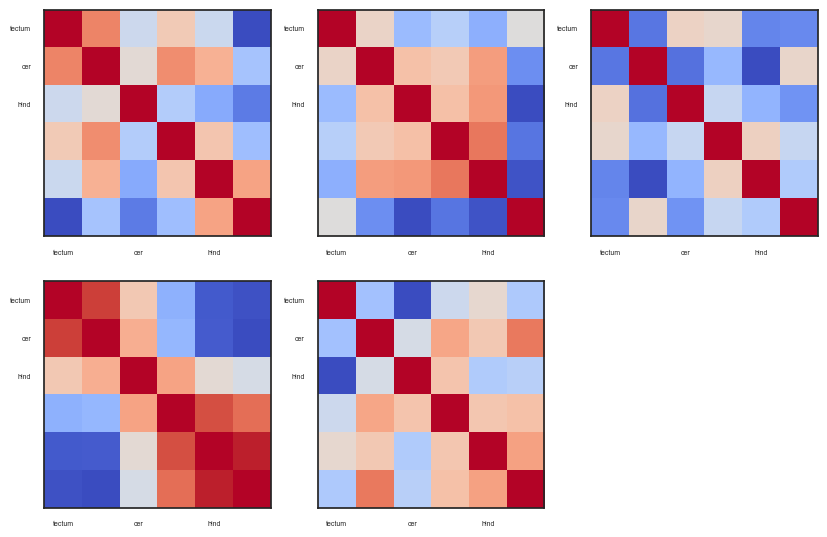

In [421]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
data_mat = wt6_mat

plt.figure(figsize=(10, 10))
for i in range(len(data_mat)):
    curr = data_mat[i]
    plt.subplot(3,3,i+1)
    plot1 = plt.imshow(curr, cmap = 'coolwarm')
    #plt.gca().set_xlabel('r', size = '15')
    #plt.gca().set_ylabel('v_th', size = '15')
    plt.gca().set_xticklabels(np.append(0, subname_list) , fontsize = 5)
    plt.gca().set_yticklabels(np.append(0,subname_list), fontsize = 5)
plt.show()

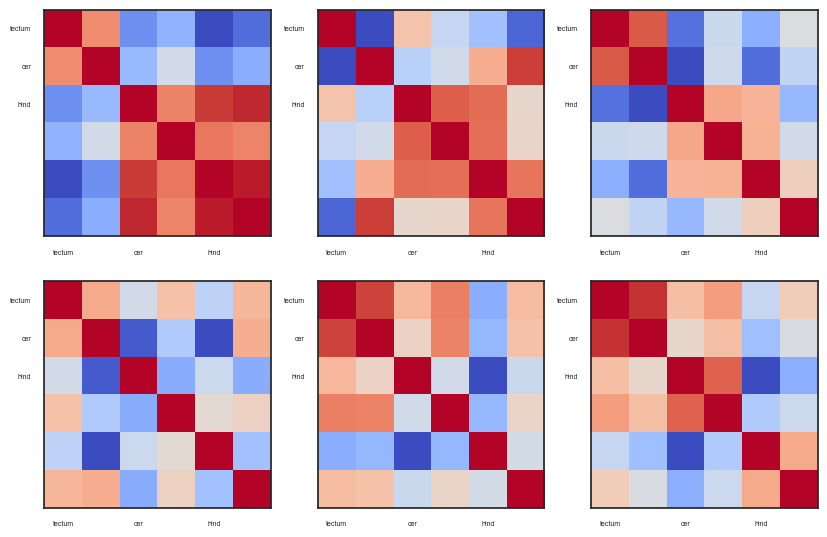

In [422]:
#NON-CONVEX FUNCTION - MULTIPLE LOCAL MINIMA
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
data_mat = mu6_mat

plt.figure(figsize=(10, 10))
for i in range(len(data_mat)):
    curr = data_mat[i]
    plt.subplot(3,3,i+1)
    plot1 = plt.imshow(curr, cmap = 'coolwarm')
    #plt.gca().set_xlabel('r', size = '15')
    #plt.gca().set_ylabel('v_th', size = '15')
    plt.gca().set_xticklabels(np.append(0, subname_list) , fontsize = 5)
    plt.gca().set_yticklabels(np.append(0,subname_list), fontsize = 5)
plt.show()

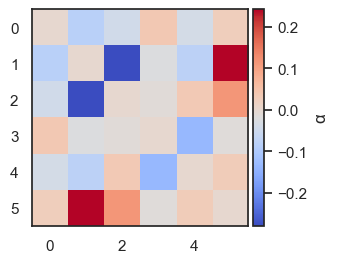

In [427]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors

f, ax = plt.subplots(figsize = (3,3))
plot1 = ax.imshow(diff6_mat, cmap = 'coolwarm')#, norm = divnorm)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'α')
plt.show()

Z score = 0.16712952627727284


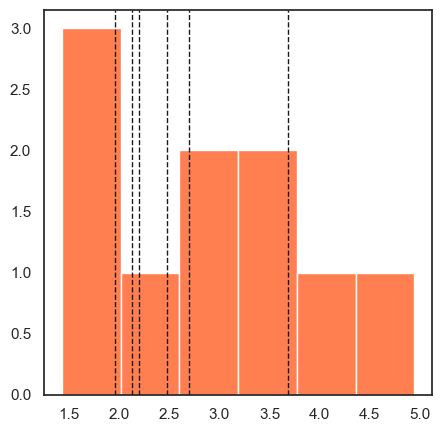

In [424]:
Z, euc_nulldist, comp_euc_mat = Zscore(wt6_mat, mu6_mat)
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
print('Z score = ' + str(Z))
f, ax = plt.subplots(figsize = (5,5))
plot1 = ax.hist(euc_nulldist, bins = 6, color = 'coral')#, norm = divnorm)
mean_list = np.mean(comp_euc_mat, axis=1)
for i in range(len(mean_list)):
    ax.axvline(mean_list[i], color='k', linestyle='dashed', linewidth=1)
plt.show()

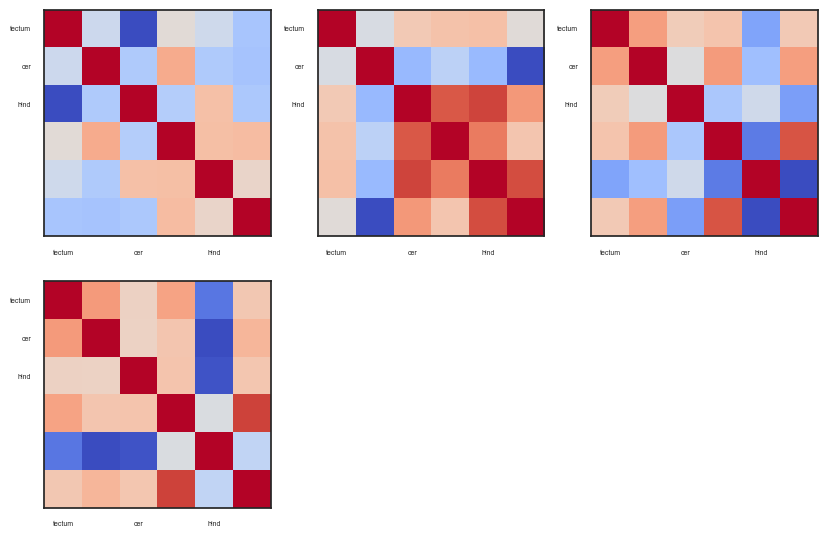

In [425]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
data_mat = wt7_mat

plt.figure(figsize=(10, 10))
for i in range(len(data_mat)):
    curr = data_mat[i]
    plt.subplot(3,3,i+1)
    plot1 = plt.imshow(curr, cmap = 'coolwarm')
    #plt.gca().set_xlabel('r', size = '15')
    #plt.gca().set_ylabel('v_th', size = '15')
    plt.gca().set_xticklabels(np.append(0, subname_list) , fontsize = 5)
    plt.gca().set_yticklabels(np.append(0,subname_list), fontsize = 5)
plt.show()

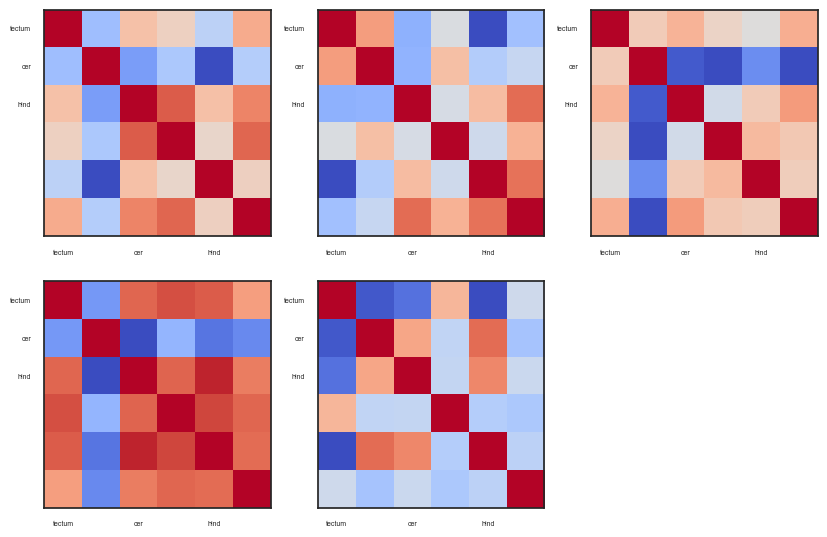

In [426]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
data_mat = mu7_mat

plt.figure(figsize=(10, 10))
for i in range(len(data_mat)):
    curr = data_mat[i]
    plt.subplot(3,3,i+1)
    plot1 = plt.imshow(curr, cmap = 'coolwarm')
    #plt.gca().set_xlabel('r', size = '15')
    #plt.gca().set_ylabel('v_th', size = '15')
    plt.gca().set_xticklabels(np.append(0, subname_list) , fontsize = 5)
    plt.gca().set_yticklabels(np.append(0,subname_list), fontsize = 5)
plt.show()

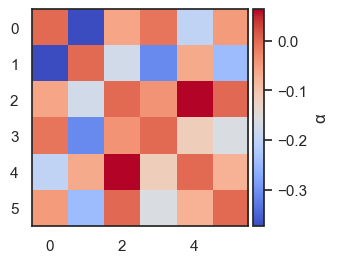

In [428]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors

f, ax = plt.subplots(figsize = (3,3))
plot1 = ax.imshow(diff7_mat, cmap = 'coolwarm')#, norm = divnorm)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'α')
plt.show()

In [430]:
euc_nulldist

array([2.92702594, 3.00289753, 2.87090615, 0.58652013, 0.60724214,
       0.36800375])

Z score = 0.6393972490727466


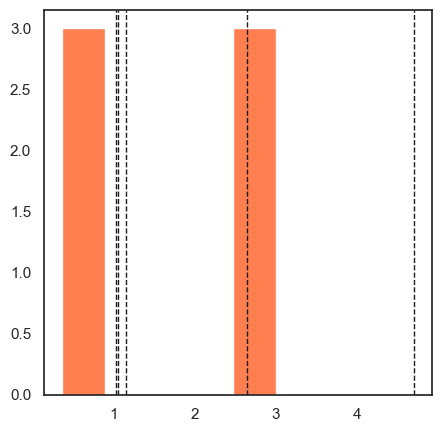

In [436]:
Z, euc_nulldist, comp_euc_mat = Zscore(wt7_mat, mu7_mat)
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
print('Z score = ' + str(Z))
f, ax = plt.subplots(figsize = (5,5))
plot1 = ax.hist(euc_nulldist, bins = 5, color = 'coral')#, norm = divnorm)
mean_list = np.mean(comp_euc_mat, axis=1)
for i in range(len(mean_list)):
    ax.axvline(mean_list[i], color='k', linestyle='dashed', linewidth=1)
plt.show()